<a href="https://colab.research.google.com/github/TriDuks/AIXuLyAnh/blob/main/Cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
from keras.datasets import cifar100
from keras.utils import to_categorical
from tensorflow import keras

keras.datasets.cifar100.load_data()
(x_train, y_train),(x_test, y_test) = keras.datasets.cifar100.load_data()
print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [11]:

fine_labels = [
    'apple',  # id 0
    'aquarium_fish',
    'baby',
    'bear',
    'beaver',
    'bed',
    'bee',
    'beetle',
    'bicycle',
    'bottle',
    'bowl',
    'boy',
    'bridge',
    'bus',
    'butterfly',
    'camel',
    'can',
    'castle',
    'caterpillar',
    'cattle',
    'chair',
    'chimpanzee',
    'clock',
    'cloud',
    'cockroach',
    'couch',
    'crab',
    'crocodile',
    'cup',
    'dinosaur',
    'dolphin',
    'elephant',
    'flatfish',
    'forest',
    'fox',
    'girl',
    'hamster',
    'house',
    'kangaroo',
    'computer_keyboard',
    'lamp',
    'lawn_mower',
    'leopard',
    'lion',
    'lizard',
    'lobster',
    'man',
    'maple_tree',
    'motorcycle',
    'mountain',
    'mouse',
    'mushroom',
    'oak_tree',
    'orange',
    'orchid',
    'otter',
    'palm_tree',
    'pear',
    'pickup_truck',
    'pine_tree',
    'plain',
    'plate',
    'poppy',
    'porcupine',
    'possum',
    'rabbit',
    'raccoon',
    'ray',
    'road',
    'rocket',
    'rose',
    'sea',
    'seal',
    'shark',
    'shrew',
    'skunk',
    'skyscraper',
    'snail',
    'snake',
    'spider',
    'squirrel',
    'streetcar',
    'sunflower',
    'sweet_pepper',
    'table',
    'tank',
    'telephone',
    'television',
    'tiger',
    'tractor',
    'train',
    'trout',
    'tulip',
    'turtle',
    'wardrobe',
    'whale',
    'willow_tree',
    'wolf',
    'woman',
    'worm',
]

# Name the numeric classes by using text file
class_names = {}
counter = 0       # For indexing keys

# Add keys and references
for instances in fine_labels:
  class_names.update({counter: instances})   # Add to dictionary
  counter+=1    # Update counter


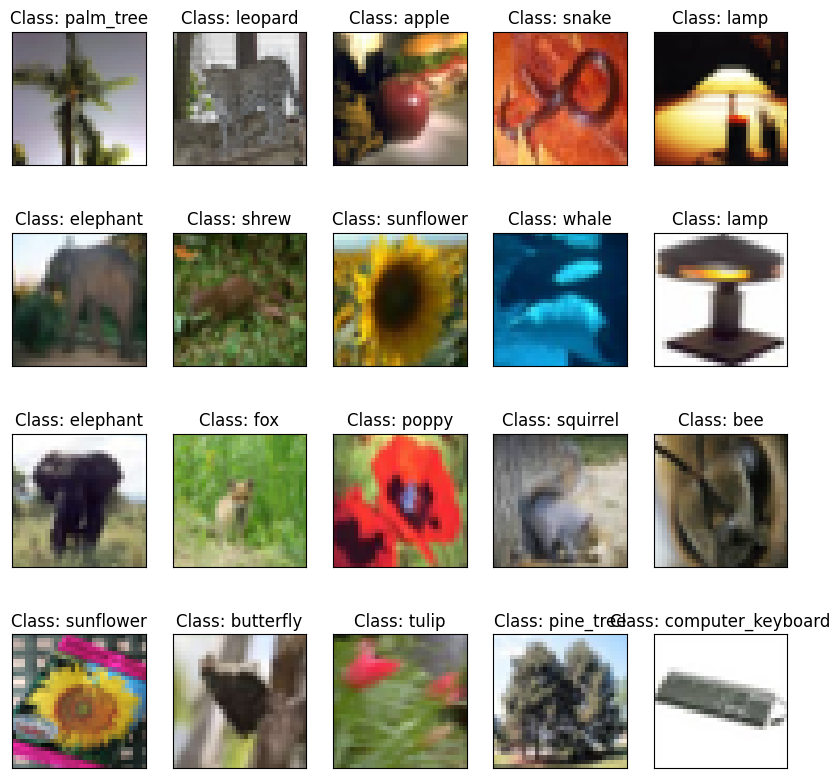

In [12]:
from random import randint
import matplotlib.pyplot as plt
# Display multiple images
fig_display = plt.figure(figsize=[10, 10])
chosen_idx = randint(0, 50000-21)

# Scan image in array
for indx in range(chosen_idx, chosen_idx+20, 1):
  axes = fig_display.add_subplot(4, 5, indx - chosen_idx +1)
  axes.imshow(x_train[indx, :, :])
  axes.set_xticks([ ])
  axes.set_yticks([ ])
  axes.set_title("Class: {}".format(class_names[y_train[indx,0]]))

In [39]:


# Reshape the sets
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test  = x_test.reshape(x_test.shape[0], 32, 32, 3)

# Rescale within the byte range
x_train_set = x_train.astype('float32')/255
x_test_set  = x_test.astype('float32')/255

train_set = to_categorical(y_train)
test_set = to_categorical(y_test)

In [40]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Normalization
import keras.backend as K
from keras.layers import LeakyReLU
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.optimizers import Adam
import tensorflow as tf

# Tạo model
model = Sequential()
#Thêm lớp chuyển đổi
model.add(tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=[32,32,3],padding='same')) #3 kênh màu RGB
#Pooling
model.add(MaxPooling2D(pool_size=(2,2) , padding = 'same'))
model.add(Dropout( 0.1))
#Tích chập lớp thứ 2
model.add(Conv2D(64,(3,3), activation = 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2) , padding = 'same'))
model.add(Dropout( 0.1))
#Tích chập lớp thứ 3
model.add(Conv2D(128,(3,3), activation = 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2) , padding = 'same'))
model.add(Dropout( 0.2))
#Làm phẳng
model.add(Flatten())
#Connect
model.add(Dense(128, activation='relu'))
model.add(Dropout( 0.2))
#model.add(Dense(64, activation='relu'))
#model.add(Dropout (0.2))
#model.add(Dense(32, activation='relu'))
#model.add(LeakyReLU(alpha = 0.1))

#Output
model.add(Dense(100, activation='softmax'))
model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_17 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 8, 8, 64)         

In [41]:
# Thiết lập thông số
from keras.optimizers import Adam
model.compile( loss = 'categorical_crossentropy', optimizer=Adam(), metrics = ['accuracy'])

In [47]:
# Huấn luyện
# fit the model
# Run the cell. It will take some time to execute
a = model.fit(x_train_set, train_set, batch_size=32, epochs=80)


Epoch 1/80


TypeError: ignored